# Análise Exploratória de Dados

### Neste notebook usaremos uma pesquisa recente nos EUA sobre o mercado de trabalho para programadores de software. Nosso objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidade de mais variáiveis, falhas  na organização e necessidads de tranformação.

### Pesquisa Salarial realizada pelo site https://www.freecodecamp.com/ com programadores do software nos EUA que frequentam treinamentos Bootcamp.

In [1]:
# Importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv("Dados-Pesquisa.csv", sep = ',', low_memory=False)

In [3]:
print(df.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
0  28.0               0.0             NaN                   NaN   
1  22.0               0.0             NaN                   NaN   
2  19.0               0.0             NaN                   NaN   
3  26.0               0.0             NaN                   NaN   
4  20.0               0.0             NaN                   NaN   

   BootcampLoanYesNo  BootcampMonthsAgo BootcampName  BootcampPostSalary  \
0                NaN                NaN          NaN                 NaN   
1                NaN                NaN          NaN                 NaN   
2                NaN                NaN          NaN                 NaN   
3                NaN                NaN          NaN                 NaN   
4                NaN                NaN          NaN                 NaN   

   BootcampRecommend  ChildrenNumber  ... ResourceSoloLearn  \
0                NaN             NaN  ...               NaN   
1             

In [4]:
df

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,bachelor's degree,Chemistry,NaN
15616,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Electrical Engineering,NaN
15617,37.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Chemistry,NaN
15618,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,master's degree (non-professional),Math,NaN


In [5]:
print(df.describe())

                Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
count  13613.000000      15380.000000      933.000000            635.000000   
mean      29.175714          0.061964        0.689175              0.584252   
std        9.017580          0.241097        0.463080              0.493239   
min       10.000000          0.000000        0.000000              0.000000   
25%       23.000000          0.000000        0.000000              0.000000   
50%       27.000000          0.000000        1.000000              1.000000   
75%       33.000000          0.000000        1.000000              1.000000   
max       86.000000          1.000000        1.000000              1.000000   

       BootcampLoanYesNo  BootcampMonthsAgo  BootcampPostSalary  \
count         934.000000         631.000000          330.000000   
mean            0.332976           9.055468        63740.506061   
std             0.471531          12.968035        26347.200265   
min             0.00

# Distribuição de Idade

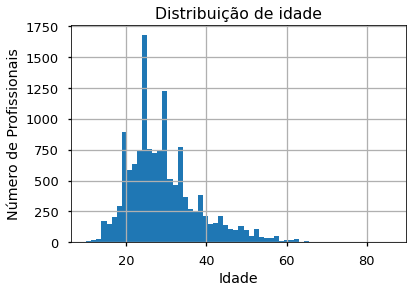

In [6]:
# A maiora dos profissionais que trabalham como programadores de
# software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos
# a idade mais frequente.

# Gerando um histograma
df.Age.hist(bins = 60)
plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição de idade")
plt.show()   

# Distribuição de Sexo

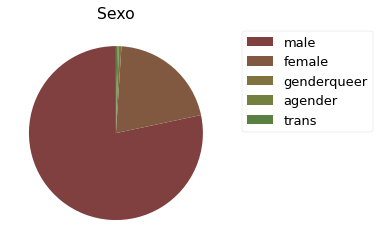

In [18]:
# A grande maioria dos programadores são do sexo masculino

# Definindo a quantidade
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05, 1))
plt.title("Sexo")
plt.show()

In [ ]:
# 06:10